# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Attribute Information
id : Unique ID for the customer

Gender : Gender of the customer

Age : Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code : Unique code for the region of the customer

Previously_Insured : 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age : Age of the Vehicle

Vehicle_Damage :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium : The amount customer needs to pay as premium in the year

PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage : Number of Days, Customer has been associated with the company

Response : 1 : Customer is interested, 0 : Customer is not interested

# Health Insurance Cross Sell Prediction
Predict Health Insurance Owners' who will be interested in Vehicle Insurance

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.

Objective

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

**1. Prepare the problem**


Importing Required Libreries 

In [1]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/tamojit-maiti/upgrad-teaching/main/classification_usecase/train.csv')

# **2. Summarize Data**

In [3]:
#showing first 5 rows
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# showing last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
# check datatypes, shape,null values
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code   

# Dataset has 381109 rows and 12 columns. There is no missing values present in dataset.

# **Descriptive statistics**

In [ ]:
#Statistical Summary of Numeric Variables
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# **Data visualizations**
**Target Variable**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


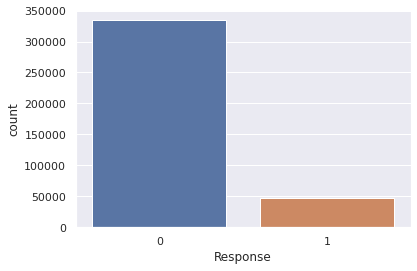

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(data['Response'],data=data)

# **Observation:**

**The data is highly imbalanced.**


Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


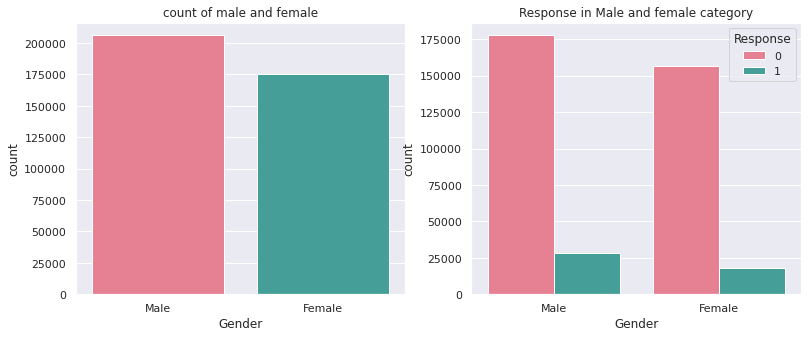

In [ ]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

# **Observation:**

The gender variable in the dataset is almost equally distributed.


Male category is slightly greater than that of female and chances of buying the insurance is also little high. 

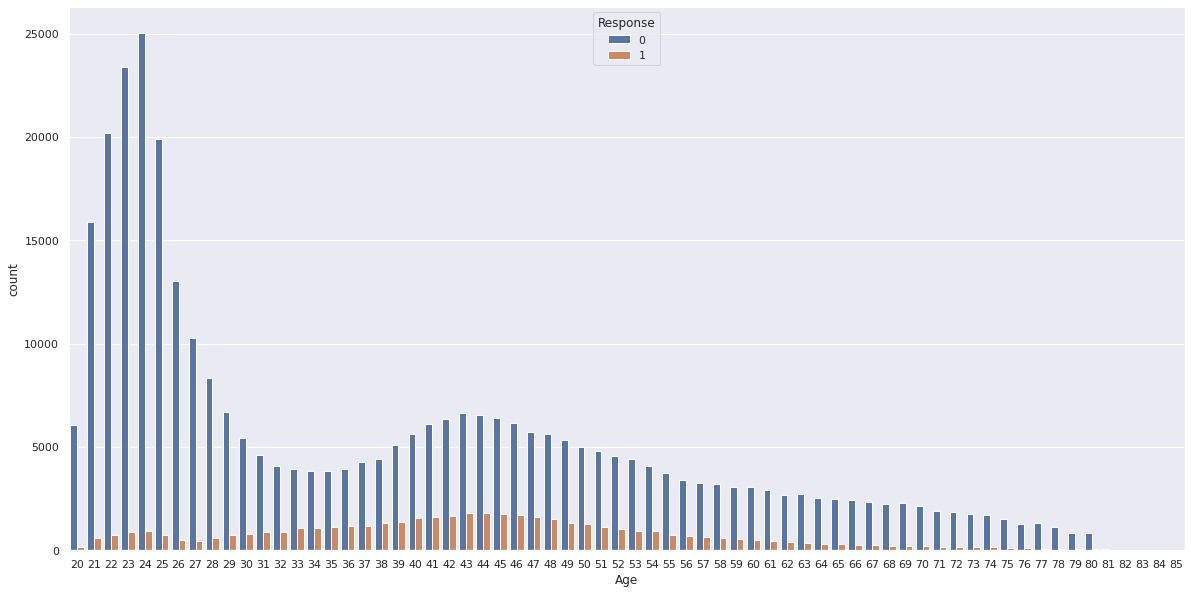

In [ ]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


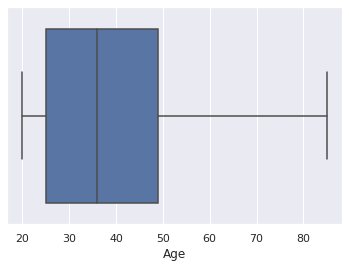

In [ ]:
sns.boxplot(data['Age'])

# **Obsrvation**

Young people below 30 are not interested in vehicle insurance. Reasons could be 

lack of experience, less maturity level and they don't have expensive vehicles yet.


People aged between 30-60 are more likely to be interested.

From the boxplot we can see that there no outlier in the data.





# **Driving License**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


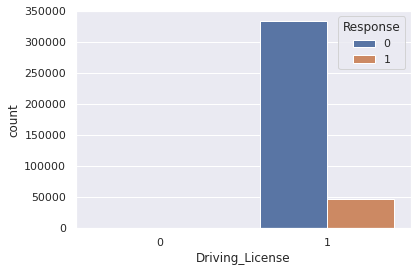

In [ ]:
sns.countplot(data['Driving_License'],hue=data['Response'])

# **Observation:**

Customers who are interested in Vehicle Insurance almost all have driving license
# Previously_Insured Vs Response

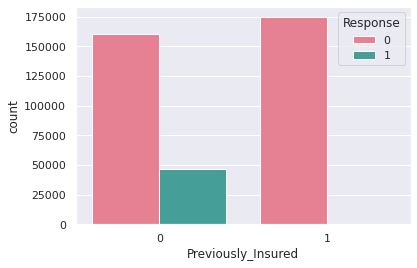

In [ ]:
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='husl')

# **Observation:**

Customer who are not perviosly insured are likely to be inetrested

**Vehicle_Age Vs Response**

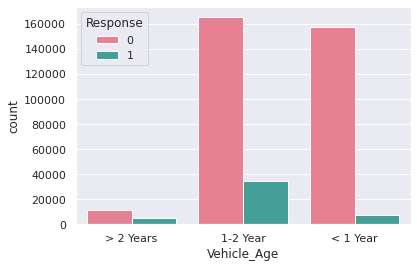

In [ ]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='husl')

# **Observation:**

Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

**Annual_Premium**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


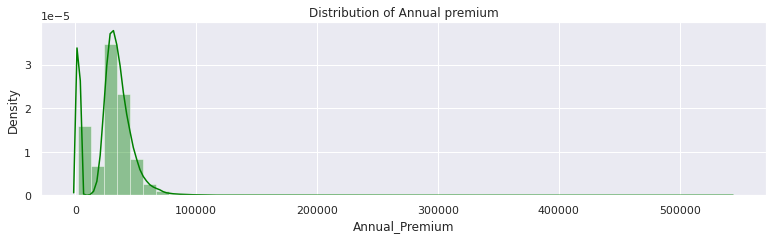

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


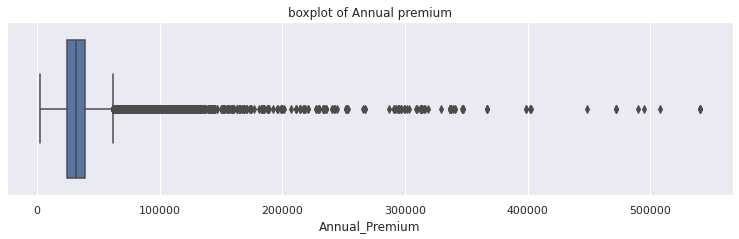

In [ ]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

# **Observation:**
From the distribution plot we can infer that the annual premimum variable is right skewed


From the boxplot we can observe lot of outliers in the variable


**Correlation Matrix**

Text(0.5, 1.05, 'Pearson correlation of Features')

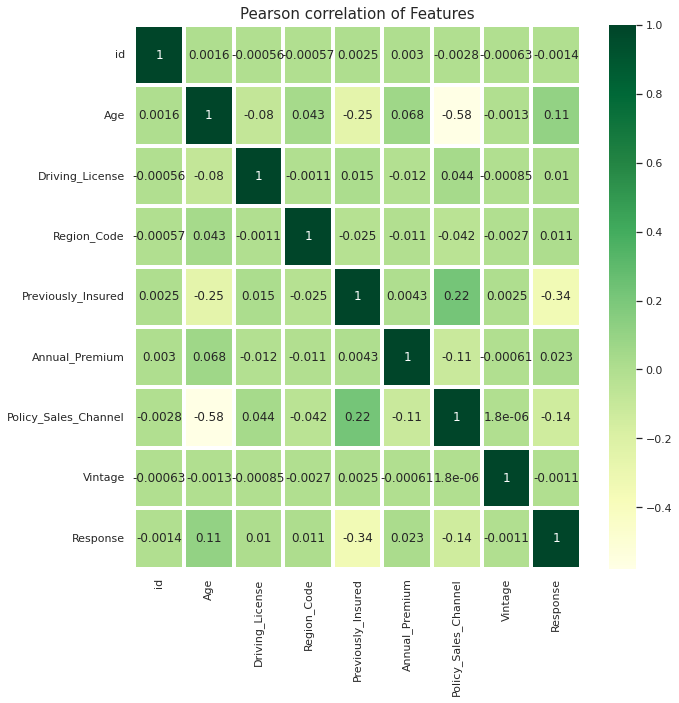

In [ ]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)

# **Observation:**

Target variable is not much affected by Vintage variable. we can drop least correlated variable.

# **3. Prepare Data**

Label encoding

In [ ]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [ ]:
data.dtypes

id                      int64
Gender                  int64
Age                     int64
Driving_License         int64
Region_Code             int64
Previously_Insured      int64
Vehicle_Age             int64
Vehicle_Damage          int64
Annual_Premium          int64
Policy_Sales_Channel    int64
Vintage                 int64
Response                int64
dtype: object

Checking duplicate rows

In [ ]:
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


# **Observation:**

there is no duplicated rows in the dataset


Seprating dependent and independent variables

In [ ]:
x=data.drop(['Response'],axis=1) #contain all  independent variable
y=data['Response']           #dependent variable

# **Feature Selection**

[0.19320569 0.00559635 0.14155896 0.00046328 0.0938345  0.05529031
 0.01557438 0.07380606 0.16390373 0.06979805 0.18696869]


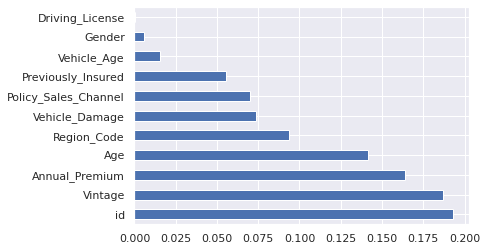

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

# **Observation: **

We can remove less important features from the data set

In [ ]:
x=x.drop(['Driving_License','Gender'],axis=1)

# **Handling Imbalanced data**


When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

**spliting of data into train and test data**

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


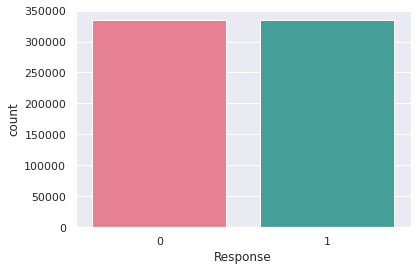

In [ ]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

In [ ]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(468158, 9) (200640, 9) (468158,) (200640,)


# **4. Model Selection**
Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

Dataset has more than 300k records

cannot go with SVM Classifier as it takes more time to train as dataset increase

Idea is to start selection of models as:

 1.Logistic Regression

 2.Random Forest

 3.XGBClassifier

# **1.Logistic Regression**

In [ ]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7837220893141946
ROC_AUC Score: 0.8338459644961325


In [ ]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61454
           1       0.98      0.70      0.82    139186

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



# **ROC Curve**

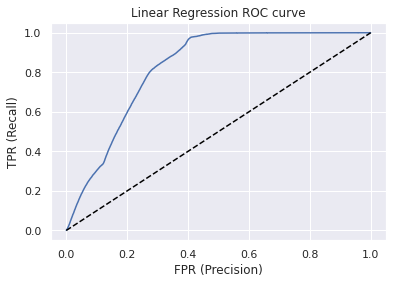

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[59194 41134]
 [ 2260 98052]]


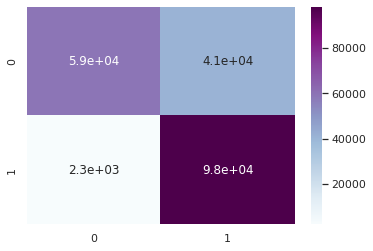

In [ ]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **2.RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.9444926236044657
ROC_AUC Score: 0.9493398068595894


In [ ]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89905
           1       1.00      0.90      0.95    110735

    accuracy                           0.94    200640
   macro avg       0.94      0.95      0.94    200640
weighted avg       0.95      0.94      0.94    200640



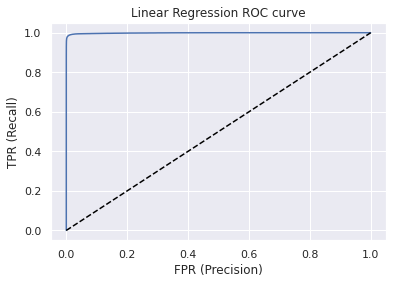

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[89548   357]
 [10780 99955]]


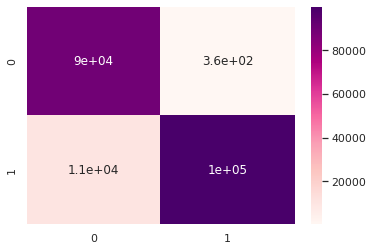

In [ ]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

# **3. XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.7973484848484849
ROC_AUC Score: 0.8200575363996468


In [ ]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77     73604
           1       0.93      0.73      0.82    127036

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



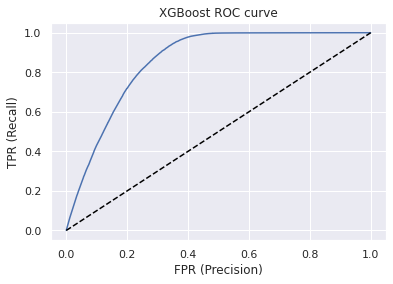

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[66636 33692]
 [ 6968 93344]]


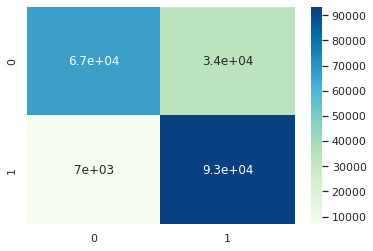

In [ ]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

# **Comparing the model**

In [ ]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783722,0.977470,0.704467,0.818813,0.833846
Randomforest,0.944493,0.996441,0.902650,0.947230,0.949340
XGBClassifier,0.797348,0.930537,0.734784,0.821155,0.820058


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

# **Conclusion**
Customers of age between 30 to 60 are more likely to buy insurance.


Customers with Driving License have higher chance of buying Insurance.


Customers with Vehicle_Damage are likely to buy insurance.


The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.


comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.